<a href="https://colab.research.google.com/github/Satyam-kumar-yadav/Snake_breed_pred/blob/main/Christmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import glob
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dense,Flatten,Dropout,AvgPool2D,Input,Lambda,InputLayer
from keras.applications import inception_v3

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
image_size=360
image_path='/content/gdrive/MyDrive/Quantanium/train_set'

train_datagen=ImageDataGenerator(
                        rescale=1./255,
#                         validation_split=0.1,
                        horizontal_flip=True,
                        width_shift_range=0.2,
                        # vertical_flip = True,
                        # height_shift_range=0.2,
                        # shear_range=0.2,
                        rotation_range=40,
                        fill_mode='nearest',
                        # zoom_range = 0.2
                        )

train_generator=train_datagen.flow_from_directory(
                        image_path, 
                        target_size=(image_size,image_size),
                        subset='training',
                        shuffle=True,
                        batch_size=32,
                        class_mode='categorical'
                        )

Found 6454 images belonging to 6 classes.


In [ ]:
valid_datagen=ImageDataGenerator(
                        validation_split=0.1,
                        rescale=1./255
                        )

valid_generator=valid_datagen.flow_from_directory(
                        image_path, 
                        target_size=(image_size,image_size),
                        subset='validation',
                        shuffle=False,
                        batch_size=32,
                        class_mode='categorical'
                        )

Found 643 images belonging to 6 classes.


In [ ]:
from keras.optimizers import *
# Hyperparameters
batch_size= 32
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
Inception = InceptionResNetV2(input_shape = (360,360,3), 
                                 include_top = False, 
                                 weights = 'imagenet')

model=Sequential()
model.add(Inception)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(labels),activation='softmax'))
model.compile(optimizer=sgd , 
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 9, 9, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1536)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1573888   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)              

In [ ]:
from keras.callbacks import EarlyStopping
#Prepare call backs
EarlyStop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
my_callback=[EarlyStop_callback]

In [ ]:
history=model.fit(train_generator,
                   steps_per_epoch=10,
                   epochs=1,
                   validation_data=valid_generator,
                   validation_steps=valid_generator.n // batch_size,
                   callbacks=[my_callback])

10/10 [==============================] - 51s 5s/step - loss: 0.0266 - accuracy: 0.9906 - val_loss: 0.0121 - val_accuracy: 0.9969


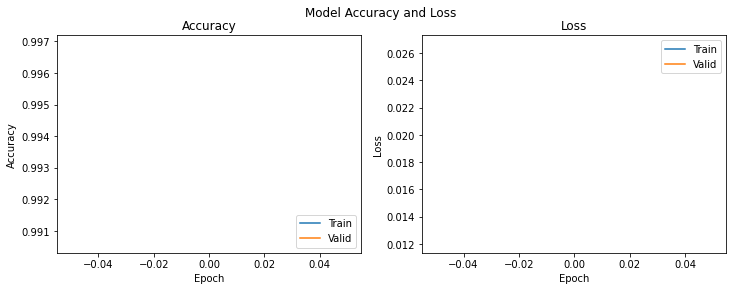

In [ ]:
def plot_model(history):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
    fig.suptitle('Model Accuracy and Loss')

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.title.set_text('Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train','Valid'],loc=4)

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.title.set_text('Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train','Valid'],loc=1)

    fig.show()

plot_model(history)

In [ ]:
import pandas as pd

In [ ]:
test_path = '/content/gdrive/MyDrive/Quantanium/dataset/test'
sample_sub = pd.read_csv('/content/gdrive/MyDrive/hackerEarth/dataset/pred (1).csv')
sample_sub.head(5)

,Image,Class
0,image7761.jpg,Miscellaneous
1,image3202.jpg,Jacket
2,image688.jpg,Snowman
3,image233.jpg,Candle
4,image4332.jpg,Christmas_Tree


In [ ]:
sample_sub.drop('Class',axis = 1,inplace = True)
test_generator = valid_datagen.flow_from_dataframe(
    sample_sub, 
    test_path, 
    x_col='Image',
    y_col=None,
    target_size=(360,360),
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 3489 validated image filenames.


In [ ]:
sample_sub

,Image
0,image7761.jpg
1,image3202.jpg
2,image688.jpg
3,image233.jpg
4,image4332.jpg
...,...
3484,image9258.jpg
3485,image4373.jpg
3486,image3971.jpg
3487,image6152.jpg


In [ ]:
prediction=model.predict(test_generator,verbose=1)
prediction.shape

110/110 [==============================] - 1211s 11s/step


(3489, 6)

In [ ]:
import numpy as np

In [ ]:
sample_sub['category'] = np.argmax(prediction, axis=-1)
sample_sub.loc[:,'Class'] = sample_sub.category.map(labels)
sample_sub.drop('category',axis=1,inplace=True)
sample_sub.set_index('Image',inplace = True)
sample_sub

,Class
Image,
image7761.jpg,Miscellaneous
image3202.jpg,Miscellaneous
image688.jpg,Snowman
image233.jpg,Candle
image4332.jpg,Christmas_Tree
...,...
image9258.jpg,Miscellaneous
image4373.jpg,Miscellaneous
image3971.jpg,Miscellaneous


In [ ]:
sample_sub.to_csv('1stPosition.csv')